# Wine Quality Classifier

##### LOAD THE DATA

In [1]:
import pandas as pd
import numpy as np

target = 'quality'

features = ['Alcohol','Malic_acid','Ash','Alcalinity',
          'Magnesium','Total_phenols','Flavanoids',
          'Nonflavanoid_phenols','Proanthocyanins',
          'Color_intensity','Hue','OD280_OD315',
          'Proline']

columns = [target] + features

X = pd.read_csv('../../../data/wine.data', names=columns, sep=',', header=None)
X.head()

,quality,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##### DATA OVERVIEW

In [2]:
X.describe()

,quality,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:
import seaborn as sns

sns.barplot(X.iloc[:,0].unique(),X.iloc[:,0].value_counts())

##### DATA STANDARIZATION AND VISUALIZATION OF FEATURES VS TARGET

C:\Users\gerardo_paniagua\.conda\envs\vision\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gerardo_paniagua\.conda\envs\vision\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


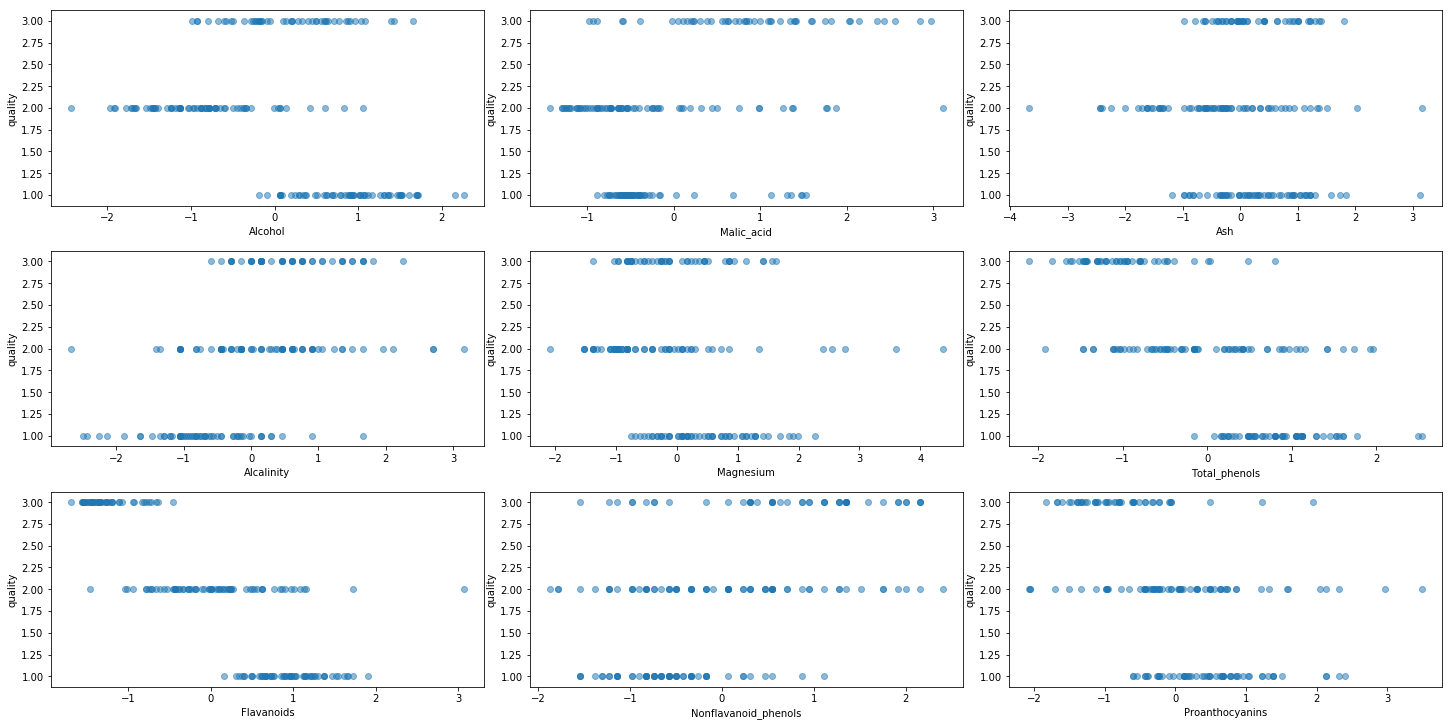

In [4]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# separate feature and target values
Y = X.iloc[:,0].copy()
X = X.iloc[:,1:]


# apply standarization to the feature values
scaler = StandardScaler()
scaler = scaler.fit(X)
X[:] = scaler.transform(X)

'''
m_scaler = MinMaxScaler(feature_range=(0, ))
m_scaler = m_scaler.fit(X)
X[:] = m_scaler.transform(X)
'''

# plot with various axes scales
rows = 3 ; cols = 3
f, ax = plt.subplots(rows, cols, figsize=(20,10))

for _row in range(rows):
    for _col in range(cols):
        col_name = X.columns[(_row*cols) + _col]
        ax[_row, _col].scatter(X[col_name], Y, alpha=0.5)
        ax[_row, _col].set_xlabel(col_name)
        ax[_row, _col].set_ylabel('quality')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

##### TRANSFORM THE TARGET VALUES TO ONE-HOT ENCODING

In [5]:
Y = pd.get_dummies(Y)
Y.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


##### SPLIT THE DATA

In [6]:
from sklearn.model_selection import train_test_split

# set the seed for reproducibility
np.random.seed(127)

# split the dataset into 2 training and 2 testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values, test_size=0.2, random_state=13)

print ("Shape of (X_train, X_test, y_train, y_test)")
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shape of (X_train, X_test, y_train, y_test)
(142, 13) (36, 13) (142, 3) (36, 3)


##### DEFINE NETWORK PARAMETERS

In [7]:
# define number of attributes
n_features = X_train.shape[1]    
n_classes = y_train.shape[1]

# count number of samples in each set of data
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# define amount of neurons
n_layer_in = n_features  # 11 neurons in input layer
n_layer_h1 = 50          # first   hidden layer
n_layer_h2 = 50          # second  hidden layer
n_layer_out = n_classes  # 7 neurons in input layer

sigma_init = 0.01   # For randomized initialization

##### MODEL ARCHITECTURE

In [8]:
import tensorflow as tf

# create symbolic variables
X = tf.placeholder(tf.float32, [None, n_features], name="input")
Y = tf.placeholder(tf.float32, [None, n_classes], name="output")

# deploy the variables that will store the weights
W = {
    'W1': tf.Variable(tf.random_normal([n_layer_in, n_layer_h1], stddev = sigma_init), name='W1'),
    'W2': tf.Variable(tf.random_normal([n_layer_h1, n_layer_h2], stddev = sigma_init), name='W2'),
    'W3': tf.Variable(tf.random_normal([n_layer_h2, n_layer_out], stddev = sigma_init), name='W3'),
}

# deploy the variables that will store the bias
b = {
    'b1': tf.Variable(tf.random_normal([n_layer_h1]), name='b1'),
    'b2': tf.Variable(tf.random_normal([n_layer_h2]), name='b2'),
    'b3': tf.Variable(tf.random_normal([n_layer_out]), name='b3'),
}

# this will create the model architecture and enable dropout on the hidden layers
# in order to avoid overfitting the training accuracy
keep_prob = 1

def model_MLP(_X, _W, _b):
    with tf.name_scope('hidden_1'):
        layer_h1 = tf.nn.relu(tf.add(tf.matmul(_X,_W['W1']), _b['b1']))
        #layer_h1 = tf.nn.dropout(layer_h1, keep_prob)
        
    with tf.name_scope('hidden_2'):
        layer_h2 = tf.nn.relu(tf.add(tf.matmul(layer_h1,_W['W2']), _b['b2']))
        #layer_h2 = tf.nn.dropout(layer_h2, keep_prob)
        
    with tf.name_scope('layer_output'):
        layer_out = tf.nn.softmax(tf.add(tf.matmul(layer_h2,_W['W3']), _b['b3']))
        return layer_out
    
with tf.name_scope("MLP"):
    y_pred = model_MLP(X, W, b)
    

##### DEFINE LEARNING RATE

In [9]:
learning_rate = 0.10

# CHOOSE A DECAYING METHOD IN HERE
model_decay = 'none'      # [exponential | inverse_time | natural_exponential | polynomial | none]

global_step = tf.Variable(0, trainable=False)
decay_rate = 0.10
decay_step = 10000

if model_decay == 'exponential':
    learning_rate = tf.train.exponential_decay(learning_rate, global_step, decay_step, decay_rate)

elif model_decay == 'inverse_time':
    learning_rate = tf.train.inverse_time_decay(learning_rate, global_step, decay_step, decay_rate)
    
elif model_decay == 'natural_exponential':
    learning_rate = tf.train.natural_exp_decay(learning_rate, global_step, decay_step, decay_rate)
    
elif model_decay == 'polynomial':
    end_learning_rate = 0.001
    learning_rate = tf.train.polynomial_decay(learning_rate, global_step, decay_step, end_learning_rate, power=0.5)
    
else:
    decay_rate = 1.0
    learning_rate = tf.train.exponential_decay(learning_rate, global_step, decay_step, decay_rate)

print('Decaying Learning Rate : ', model_decay)

Decaying Learning Rate :  none


##### DEFINE MODEL TRAINING AND MEASURE PERFORMANCE
If X only has one column (one variable) don't use tf.reduce_mean in the definition of the loss function

In Mathematics, Logitis a function that is used to maps probabilities ( [0, 1] ) to R ( (-inf, inf) ) .

A logits of 0 corresponds to a probability of 0.5.

A negative logit corresponds to a probability of less than 0.5.

A positive logit corresponds to a probability greater than 0.5.

In ML, logits can be defined as a vector of raw predictions that a classification model generates and it is passed to a normalized function. In case the model is solving a classification problem having multiple class, logits will behave as an input to the softmax function. Then the softmax function generates a vector of probability having one value for each class. Logits sometime also refer to the element-wise inverse of the sigmoid function.
https://intellipaat.com/community/500/what-is-the-meaning-of-the-word-logits-in-tensorflow

In [10]:
with tf.name_scope("loss"):
    #loss = tf.square(Y - y_pred)                                                       # squared error
    #loss = tf.nn.softmax(logits=y_pred)                                                # softmax
    #loss = tf.nn.log_softmax(logits=y_pred)                                            # log-softmax
    #loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=y_pred, dim=-1) # cross-entropy
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=y_pred)            # sigmoid-cross-entropy
    #loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y, logits=y_pred)     # sparse-softmax-cross-entropy
    loss = tf.reduce_mean(loss, name='MSE')
    
with tf.name_scope("train"):
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate)                     # SGD
    #optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=0.9) # MOMENTUM
    #optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)               # ADAGRAD
    #optimizer = tf.train.AdadeltaOptimizer(learning_rate=learning_rate)              # ADADELTA
    optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate, decay=1)      # RMS
    training_op = optimizer.minimize(loss, global_step=global_step)

with tf.name_scope("eval"):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    

# Create summaries
tf.summary.scalar("loss", loss)
tf.summary.scalar("accuracy", accuracy)
tf.summary.scalar("learn_rate", learning_rate)

# Merge all summaries into a single op to generate the summary data
merged_summary_op = tf.summary.merge_all()

##### EXECUTE THE MODEL

In [11]:
from datetime import datetime

# define some parameters
n_epochs = 200
display_epoch = 10
batch_size = 10
n_batches = int(n_train/batch_size)

# set up the directory to store the results for tensorboard
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

# this will later help me to restore the model to a specific epoch
saver = tf.train.Saver(tf.global_variables())

# store results through every epoch iteration
acc_train_list = []
acc_test_list = []
avg_loss_list = []
learning_list = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # write logs for tensorboard
    summary_writer = tf.summary.FileWriter(logdir, graph=tf.get_default_graph())
    
    for epoch in range(1, n_epochs+1):
        avg_loss = 0    # store batches' average loss
        
        for i in range(0, n_train, batch_size):
            # create batches
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
            
            # start model training
            sess.run(training_op, feed_dict={X:X_batch, Y:y_batch})
            
            
            # Run optimization (backprop), cost and summary nodes
            _, _loss, _summary = sess.run([training_op, loss, merged_summary_op],
                                          feed_dict={X:X_batch, Y:y_batch})
            avg_loss += _loss/n_batches
            
            # Write logs at every iteration
            summary_writer.add_summary(_summary, epoch * n_batches + i)
            
        # after the epoch is finished this will append the loss
        avg_loss_list.append(avg_loss)
            
        # measure performance and display the results
        if (epoch+1) % display_epoch == 0:
            _acc_train = accuracy.eval({X: X_train, Y:y_train})
            _acc_test = accuracy.eval(feed_dict={X: X_test, Y: y_test})
            
            # append results to lists
            acc_train_list.append(_acc_train); acc_test_list.append(_acc_test)
            learning_list.append(sess.run(learning_rate))

            # Save model weights to disk for reproducibility
            saver = tf.train.Saver(max_to_keep=15)
            saver.save(sess, "tf_checkpoints/epoch{:04}.ckpt".format((epoch+1)))
            
            print("Epoch: {:04}\tTrainAcc: {:06.5f}\tTestAcc: {:06.5f}\tLoss: {:06.5f}\tLearning: {:06.7f}".format((epoch+1),
                                                                                                                   _acc_train,
                                                                                                                   _acc_test,
                                                                                                                   avg_loss,
                                                                                                                   sess.run(learning_rate)))
            
    # store the predicted values
    predictions = sess.run(y_pred, feed_dict={X: X_test, Y: y_test})
    print('\nPrinting network raw output \n\n', predictions)
    predictions = tf.argmax(predictions, 1).eval()
    
    # output comparative table
    dataframe = pd.DataFrame(predictions, columns=['Prediction'])
    dataframe['Target'] = np.argmax(y_test, 1)
    dataframe['Hit'] = np.equal(dataframe.Target, dataframe.Prediction)
    print('\n\nPrinting results :\n\n', dataframe)

Epoch: 0010	TrainAcc: 0.39437	TestAcc: 0.41667	Loss: 0.81215	Learning: 0.1000000
Epoch: 0020	TrainAcc: 0.39437	TestAcc: 0.41667	Loss: 0.81181	Learning: 0.1000000
Epoch: 0030	TrainAcc: 0.39437	TestAcc: 0.41667	Loss: 0.81165	Learning: 0.1000000
Epoch: 0040	TrainAcc: 0.39437	TestAcc: 0.41667	Loss: 0.81148	Learning: 0.1000000
Epoch: 0050	TrainAcc: 0.39437	TestAcc: 0.41667	Loss: 0.81067	Learning: 0.1000000
Epoch: 0060	TrainAcc: 0.64085	TestAcc: 0.63889	Loss: 0.77980	Learning: 0.1000000
Epoch: 0070	TrainAcc: 0.64789	TestAcc: 0.63889	Loss: 0.71586	Learning: 0.1000000
Epoch: 0080	TrainAcc: 0.95775	TestAcc: 0.94444	Loss: 0.64580	Learning: 0.1000000
Epoch: 0090	TrainAcc: 0.99296	TestAcc: 0.97222	Loss: 0.61501	Learning: 0.1000000
Epoch: 0100	TrainAcc: 1.00000	TestAcc: 0.97222	Loss: 0.61021	Learning: 0.1000000
Epoch: 0110	TrainAcc: 1.00000	TestAcc: 0.97222	Loss: 0.60889	Learning: 0.1000000
Epoch: 0120	TrainAcc: 1.00000	TestAcc: 0.97222	Loss: 0.60830	Learning: 0.1000000
Epoch: 0130	TrainAcc: 1.0000

##### VISUALIZE THE RESULTS

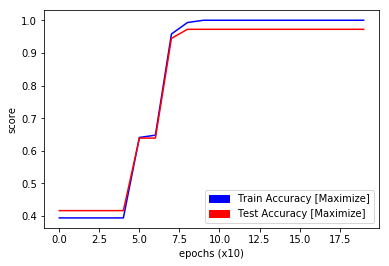

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# set up legend
blue_patch = mpatches.Patch(color='blue', label='Train Accuracy [Maximize]')
red_patch = mpatches.Patch(color='red', label='Test Accuracy [Maximize]')
plt.legend(handles=[blue_patch,red_patch])

#plot the data
plt.plot(acc_train_list, color='blue')
plt.plot(acc_test_list, color='red')

plt.xlabel('epochs (x{})'.format(display_epoch))
plt.ylabel('score');

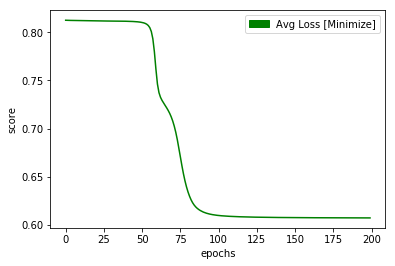

In [13]:
# set up legend
green_patch = mpatches.Patch(color='green', label='Avg Loss [Minimize]')
plt.legend(handles=[green_patch])

#plot the data
plt.plot(avg_loss_list, color='green')

plt.xlabel('epochs')
plt.ylabel('score');

##### LEARNING RATE EVOLUTION

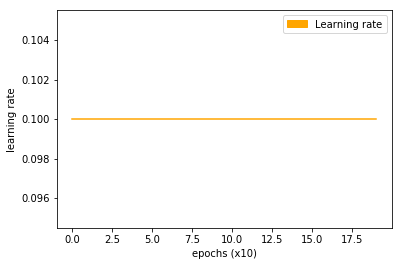

In [14]:
or_patch = mpatches.Patch(color='orange', label='Learning rate')
plt.legend(handles=[or_patch])

plt.plot(learning_list, color='orange');
plt.xlabel('epochs (x{})'.format(display_epoch))
plt.ylabel('learning rate');

##### VISUALIZE TENSORBOARD

In [15]:
'''
from IPython.display import clear_output, Image, display, HTML

#   CHECK IT ON TENSORBOARD TYPING THESE LINES IN THE COMMAND PROMPT:
#   tensorboard --logdir=/tmp/tf_logs

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))
    
show_graph(tf.get_default_graph())
'''

##### RESTORE TO CHECKPOINT

In [16]:
'''
# select the epoch to be restored
epoch = 30

# Running a new session
print('Restoring model to Epoch {}\n'.format(epoch))


with tf.Session() as sess:
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    
    # Restore model weights from previously saved model
    checkpoint = tf.train.import_meta_graph('tf_checkpoints/epoch{:04}.ckpt.meta'.format(epoch))
    #checkpoint.restore(sess, 'tf_checkpoints/epoch{:04}'.format(epoch))
    
    my_input = X_test
    print(y_test)
    predictions = sess.run(y_pred, feed_dict={X: my_input})
    print(predictions)
    #dataframe = pd.DataFrame(predictions, columns=['Prediction'])
    #dataframe['Target'] = y_test.values
    #dataframe['Difference'] = dataframe.Target - dataframe.Prediction
    
#dataframe
'''

"\n# select the epoch to be restored\nepoch = 30\n\n# Running a new session\nprint('Restoring model to Epoch {}\n'.format(epoch))\n\n\nwith tf.Session() as sess:\n    # Initialize variables\n    sess.run(tf.global_variables_initializer())\n    \n    # Restore model weights from previously saved model\n    checkpoint = tf.train.import_meta_graph('tf_checkpoints/epoch{:04}.ckpt.meta'.format(epoch))\n    #checkpoint.restore(sess, 'tf_checkpoints/epoch{:04}'.format(epoch))\n    \n    my_input = X_test\n    print(y_test)\n    predictions = sess.run(y_pred, feed_dict={X: my_input})\n    print(predictions)\n    #dataframe = pd.DataFrame(predictions, columns=['Prediction'])\n    #dataframe['Target'] = y_test.values\n    #dataframe['Difference'] = dataframe.Target - dataframe.Prediction\n    \n#dataframe\n"